In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
data, target = mnist["data"], mnist["target"]
print(f"data의 type : {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},  target의 shape : {target.shape}")

data의 type : <class 'pandas.core.frame.DataFrame'>,  data의 shape : (70000, 784)
target의 type : <class 'pandas.core.series.Series'>,  target의 shape : (70000,)


In [4]:
target.dtypes

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [5]:
data, target = mnist["data"], mnist["target"]

In [6]:
# Since data type of all elements of target is string, we'll convert them into integer
target = target.astype(np.int8)

# We'll extract only values from data and target.
data, target = data.values, target.values.reshape(1, -1)

print(f"data의 type :   {type(data)},  data의 shape : {data.shape}")
print(f"target의 type : {type(target)},  target의 shape : {target.shape},   target element의 type : {type(target[0])}")

data의 type :   <class 'numpy.ndarray'>,  data의 shape : (70000, 784)
target의 type : <class 'numpy.ndarray'>,  target의 shape : (1, 70000),   target element의 type : <class 'numpy.ndarray'>


In [7]:
target_dict = {}
label, freq = np.unique(target, return_counts=True)
for l, f in zip(label, freq):
    target_dict[l] = f
    
print(target_dict)

{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


In [8]:
# Normalize data to keep our gradients manageable
data = data / 255
print(np.max(data), np.min(data))

1.0 0.0


In [9]:
digits = 10
examples = target.shape[1]

target_new = np.eye(digits)[target]
target_new = target_new.T.reshape(digits, examples)
target_new.shape

(10, 70000)

In [10]:
# We'll split data into train and test set. We also transpose data to keep each example as a column.
m = 60000
m_test = data.shape[0] - m

x_train, x_test = data[:m].T, data[m:].T
y_train, y_test = target_new[:, :m], target_new[:, m:]

print(f"x_train의 shape : {x_train.shape},   y_train의 shape : {y_train.shape}")
print(f"x_test의  shape : {x_test.shape},   y_test의 shape :  {y_test.shape}")

x_train의 shape : (784, 60000),   y_train의 shape : (10, 60000)
x_test의  shape : (784, 10000),   y_test의 shape :  (10, 10000)


In [11]:
np.random.seed(2023)
shuffle_index = np.random.permutation(m)
x_train, y_train = x_train[:, shuffle_index], y_train[:, shuffle_index]

print(f"x_train의 shape : {x_train.shape},   y_train의 shape : {y_train.shape}")
print(f"x_test의  shape : {x_test.shape},   y_test의 shape :  {y_test.shape}")

x_train의 shape : (784, 60000),   y_train의 shape : (10, 60000)
x_test의  shape : (784, 10000),   y_test의 shape :  (10, 10000)


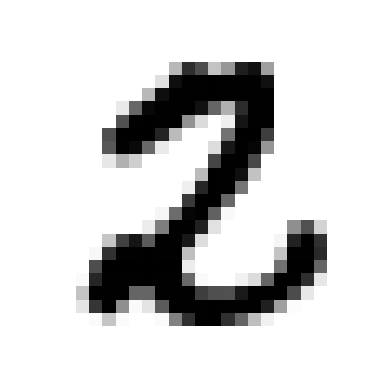

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
import matplotlib
import matplotlib.pyplot as plt

i = 12
plt.imshow(x_train[:, i].reshape(28, 28), cmap=matplotlib.cm.binary)
plt.axis("off")
plt.show()
y_train[:, i]

In [13]:
def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))
    return s

In [14]:
def comput_multiclass_loss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum
    return L

In [15]:
digits = 10
n_x, n_h = x_train.shape[0], 64
learning_rate = 1

w1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
w2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X, Y = x_train, y_train

print(f"X의 shape : {X.shape},   Y의 shape : {Y.shape}")

X의 shape : (784, 60000),   Y의 shape : (10, 60000)


In [31]:
for i in range(2000):
    Z1 = np.matmul(w1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(w2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    cost = comput_multiclass_loss(Y, A2)
    
    dZ2 = A2 - Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(w2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    w2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    w1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    if (i % 100 == 0):
        print(f"Epoch {i: .4d}       cost : {cost}")
print("Final cost : ", cost)

Epoch    0       cost : 9.734082013758602
Epoch  100       cost : 0.7505197512444232
Epoch  200       cost : 0.5605266132154871
Epoch  300       cost : 0.4815003598755821
Epoch  400       cost : 0.4348225551354636
Epoch  500       cost : 0.40250199554601135
Epoch  600       cost : 0.3779448680030466
Epoch  700       cost : 0.35826004197892525
Epoch  800       cost : 0.34191000788620574
Epoch  900       cost : 0.32794299968753315
Epoch  1000       cost : 0.31574902353437423
Epoch  1100       cost : 0.3049308507524267
Epoch  1200       cost : 0.29522007444119647
Epoch  1300       cost : 0.2864181098235761
Epoch  1400       cost : 0.27837030343276775
Epoch  1500       cost : 0.27095795549846335
Epoch  1600       cost : 0.26409153380932615
Epoch  1700       cost : 0.25770261948573064
Epoch  1800       cost : 0.25173770010981844
Epoch  1900       cost : 0.2461524459434124
Final cost :  0.24095866567169494


In [33]:
print(f"w1의 shape : {w1.shape}, b1의 shape : {b1.shape}, z1의 shape : {Z1.shape}")   # (64, 784), (64, 1), (64, 60000)
print(f"w2의 shape : {w2.shape},  b2의 shape : {b2.shape}, z2의 shape : {Z2.shape}")   # (10, 64),  (10, 1), (10, 60000)

w1의 shape : (64, 784), b1의 shape : (64, 1), z1의 shape : (64, 60000)
w2의 shape : (10, 64),  b2의 shape : (10, 1), z2의 shape : (10, 60000)


In [34]:
from sklearn.metrics import confusion_matrix, classification_report

z1_test = np.matmul(w1, x_test) + b1
a1_test = sigmoid(z1_test)
z2_test = np.matmul(w2, a1_test) + b2
a2_test = np.exp(z2_test) / np.sum(np.exp(z2_test), axis=0)

In [36]:
predictions = np.argmax(a2_test, axis=0)
labels = np.argmax(y_test, axis=0)

print(f"predictions의 shape : {predictions.shape},   labels의 shape : {labels.shape}")

predictions의 shape : (10000,),   labels의 shape : (10000,)


In [37]:
print(confusion_matrix(predictions, labels))

[[ 947    0   13    5    1   11   16    3   11    6]
 [   0 1114    9    2    2    0    2    9    4    5]
 [   2    2  921   22    7    7   17   31   11    5]
 [   6    3   18  922    2   33    1   10   21   10]
 [   0    1    7    1  904    6   12    5   12   37]
 [  10    1    6   33    2  787   16    2   14   11]
 [  10    3   14    0   13    9  886    0    7    1]
 [   2    1   12    9    5    6    0  934    7   19]
 [   3    9   30    9   13   21    8    1  875   14]
 [   0    1    2    7   33   12    0   33   12  901]]


In [38]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1013
           1       0.98      0.97      0.98      1147
           2       0.89      0.90      0.90      1025
           3       0.91      0.90      0.91      1026
           4       0.92      0.92      0.92       985
           5       0.88      0.89      0.89       882
           6       0.92      0.94      0.93       943
           7       0.91      0.94      0.92       995
           8       0.90      0.89      0.89       983
           9       0.89      0.90      0.90      1001

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Epoch   0       cost : 7.068466863908838
Epoch  60       cost : 0.9001860013963914
Epoch 120       cost : 0.671163838904361
Epoch 180       cost : 0.5765204170323178
Epoch 240       cost : 0.5205476093842504
Epoch 300       cost : 0.48180726226543613
Epoch 360       cost : 0.45262550164090226
Epoch 420       cost : 0.4294916177098603
Final cost :  0.4294916177098603


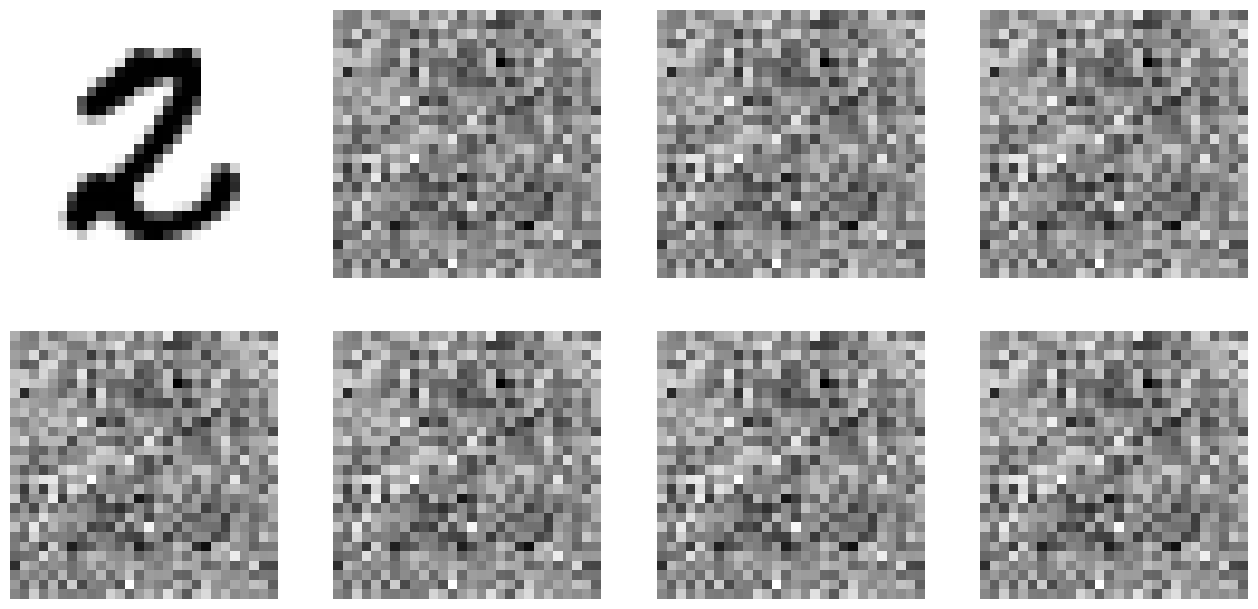

In [16]:
digits = 10
n_x, n_h = x_train.shape[0], 64
learning_rate = 1

w1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
w2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X, Y = x_train, y_train

# print(f"X의 shape : {X.shape},   Y의 shape : {Y.shape}")

plt.figure(figsize=(15, 6))

for i in range(2000):
    Z1 = np.matmul(w1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(w2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    cost = comput_multiclass_loss(Y, A2)
    
    dZ2 = A2 - Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(w2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    w2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    w1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    if (i % 200 == 0):
        print(f"Epoch {i:3d}       cost : {cost}")
        
        # X_proxy 구하기
        WWT = np.matmul(w1, w1.T)
        WWT_inv = np.linalg.inv(WWT)
        W_right_inv = np.matmul(w1.T, WWT_inv)
        X_proxy = np.matmul(W_right_inv, Z1-b1)
        
        if i == 0:
            img_12 = X[:, 12]
        else:
            img_12 = X_proxy[:, 12]        
        
        plt.subplot(2, 5, (i//200 + 1))
        plt.imshow(img_12.reshape(28,28), cmap=matplotlib.cm.binary)
        plt.axis("off")    
    
print("Final cost : ", cost)

In [81]:
w11 = np.array([[3,7,5],[6,4,2],[0,1,8]])
x11 = np.array([[2,9,3,7,1,3,8],[2,3,8,0,5,6,3],[4,2,9,5,1,7,9]])
b11 = np.array([[2],[8],[7]])

w11.shape, x11.shape, b11.shape

((3, 3), (3, 7), (3, 1))

In [82]:
print(w11)
print()
print(x11)
print()
print(b11)

[[3 7 5]
 [6 4 2]
 [0 1 8]]

[[2 9 3 7 1 3 8]
 [2 3 8 0 5 6 3]
 [4 2 9 5 1 7 9]]

[[2]
 [8]
 [7]]


In [83]:
z11 = np.matmul(w11, x11) + b11
print(z11.shape)
print(z11)

(3, 7)
[[ 42  60 112  48  45  88  92]
 [ 36  78  76  60  36  64  86]
 [ 41  26  87  47  20  69  82]]


In [84]:
x11_reverse = np.matmul(np.linalg.inv(w11), (z11-b11)).astype(int)

print(x11_reverse.shape)
print()
print(np.round(x11_reverse))
print()
print(x11)

(3, 7)

[[2 9 2 7 0 2 7]
 [1 2 8 0 4 5 2]
 [4 2 9 5 1 7 9]]

[[2 9 3 7 1 3 8]
 [2 3 8 0 5 6 3]
 [4 2 9 5 1 7 9]]
